In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from datetime import datetime
import plotly.express as px

In [24]:
'''import requests
import csv
from datetime import datetime, timedelta

# Replace with your API key
API_KEY = " 56cdd10fcb5c468cbb4193934241803"

# Set the location and date range for historic weather data
location = input('enter location')
start_date = datetime(2024, 6, 18)  # Start date (YYYY, MM, DD)
end_date = datetime(2024, 6, 24)   # End date (YYYY, MM, DD)

# Set the base URL and parameters for the API request
base_url = "http://api.weatherapi.com/v1/history.json"
params = {
    "key": API_KEY,
    "q": location,
    "dt": start_date.strftime("%Y-%m-%d")
}

# Initialize an empty list to store weather data
weather_data = []

# Loop through the date range and fetch weather data for each day
current_date = start_date
while current_date <= end_date:
    params["dt"] = current_date.strftime("%Y-%m-%d")
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        for forecast in data["forecast"]["forecastday"]:
            for hour in forecast["hour"]:
                weather_data.append({
                    "Date": hour["time"].split(" ")[0],
                    "Time": hour["time"].split(" ")[1],
                    "Temperature (C)": hour["temp_c"],
                    "Humidity": hour["humidity"],
                    "Wind Speed (km/h)": hour["wind_kph"],
                    "Precipitation (mm)": hour["precip_mm"]
                })
    else:
        print(f"Error fetching data for {current_date}: {response.status_code} - {response.text}")
    
    current_date += timedelta(days=1)

# Save weather data to a CSV file
with open("historic_weather_data.csv", "w", newline="") as csvfile:
    fieldnames = ["Date", "Time", "Temperature (C)", "Humidity", "Wind Speed (km/h)", "Precipitation (mm)"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for data in weather_data:
        writer.writerow(data)

print(f"Historic weather data of {location} saved to historic_weather_data.csv")'''

Error fetching data for 2024-06-18 00:00:00: 400 - {"error":{"code":1008,"message":"API key is limited to get history data. Please check our pricing page and upgrade to higher plan."}}
Error fetching data for 2024-06-19 00:00:00: 400 - {"error":{"code":1008,"message":"API key is limited to get history data. Please check our pricing page and upgrade to higher plan."}}
Error fetching data for 2024-06-20 00:00:00: 400 - {"error":{"code":1008,"message":"API key is limited to get history data. Please check our pricing page and upgrade to higher plan."}}
Historic weather data of Patna saved to historic_weather_data.csv


In [25]:
weather01 = pd.read_csv('historic_weather_data.csv')
weather01

,Date,Time,Temperature (C),Humidity,Wind Speed (km/h),Precipitation (mm)
0,2024-06-21,00:00,33.9,49,25.2,0.00
1,2024-06-21,01:00,33.5,50,22.0,0.01
2,2024-06-21,02:00,33.6,48,20.2,0.02
3,2024-06-21,03:00,33.1,50,12.2,0.43
4,2024-06-21,04:00,31.8,56,10.4,1.97
...,...,...,...,...,...,...
91,2024-06-24,19:00,38.8,36,4.0,0.45
92,2024-06-24,20:00,38.6,36,9.7,0.54
93,2024-06-24,21:00,37.3,40,13.0,0.16
94,2024-06-24,22:00,36.1,44,14.4,0.14


In [26]:
weather01['datetime'] = pd.to_datetime(weather01['Date'] + ' ' + weather01['Time'])

weather01.drop(columns=['Date', 'Time'], inplace=True)
weather01

,Temperature (C),Humidity,Wind Speed (km/h),Precipitation (mm),datetime
0,33.9,49,25.2,0.00,2024-06-21 00:00:00
1,33.5,50,22.0,0.01,2024-06-21 01:00:00
2,33.6,48,20.2,0.02,2024-06-21 02:00:00
3,33.1,50,12.2,0.43,2024-06-21 03:00:00
4,31.8,56,10.4,1.97,2024-06-21 04:00:00
...,...,...,...,...,...
91,38.8,36,4.0,0.45,2024-06-24 19:00:00
92,38.6,36,9.7,0.54,2024-06-24 20:00:00
93,37.3,40,13.0,0.16,2024-06-24 21:00:00
94,36.1,44,14.4,0.14,2024-06-24 22:00:00


In [27]:
mpl.rcParams['figure.figsize'] = (15,6)


In [28]:
weather01= weather01.set_index('datetime')

In [29]:
weather01

,Temperature (C),Humidity,Wind Speed (km/h),Precipitation (mm)
datetime,,,,
2024-06-21 00:00:00,33.9,49,25.2,0.00
2024-06-21 01:00:00,33.5,50,22.0,0.01
2024-06-21 02:00:00,33.6,48,20.2,0.02
2024-06-21 03:00:00,33.1,50,12.2,0.43
2024-06-21 04:00:00,31.8,56,10.4,1.97
...,...,...,...,...
2024-06-24 19:00:00,38.8,36,4.0,0.45
2024-06-24 20:00:00,38.6,36,9.7,0.54
2024-06-24 21:00:00,37.3,40,13.0,0.16


In [30]:
weather01 = weather01.reset_index()[['datetime','Temperature (C)','Humidity','Wind Speed (km/h)','Precipitation (mm)']].rename({'datetime':'ds','Temperature (C)':'y'}, axis = 'columns')

In [31]:
fig = px.line(weather01, x='ds', y='y', title='Weather Data Over Time')
fig.show()

c:\Users\shree\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [32]:
'''import seaborn as sns
sns.lineplot(x = 'ds', y= 'y', data= weather01)'''

"import seaborn as sns\nsns.lineplot(x = 'ds', y= 'y', data= weather01)"

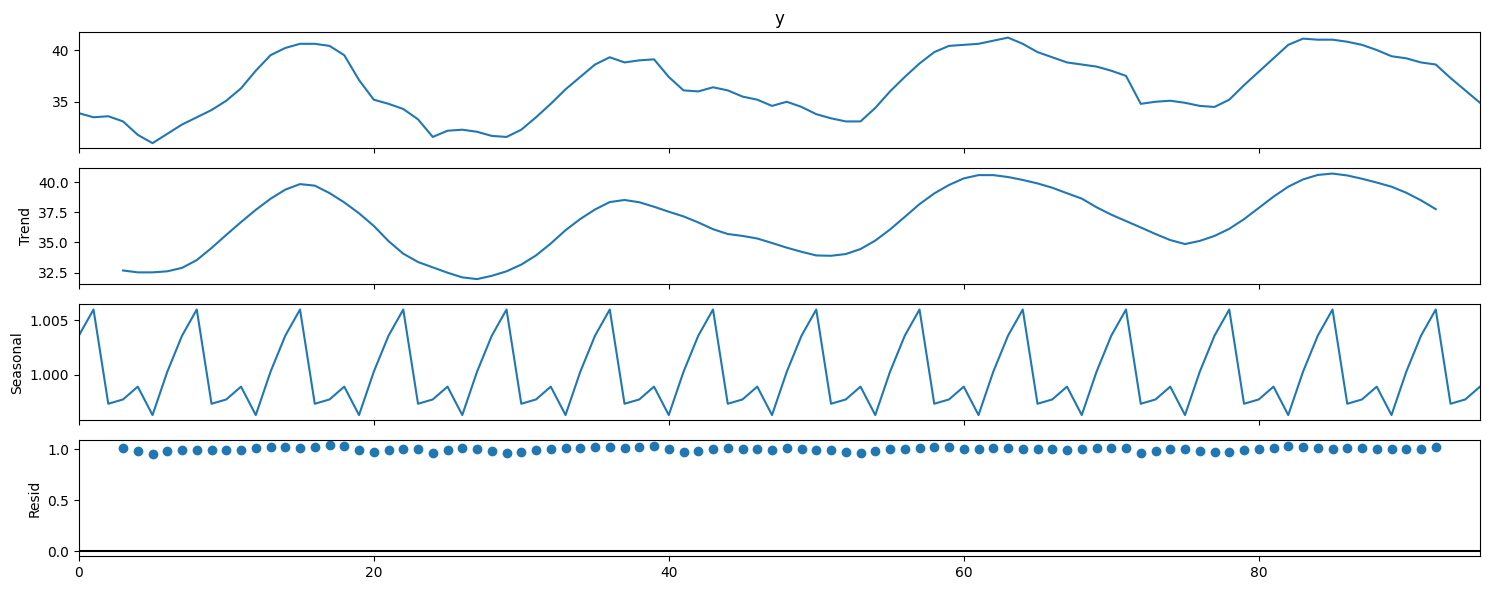

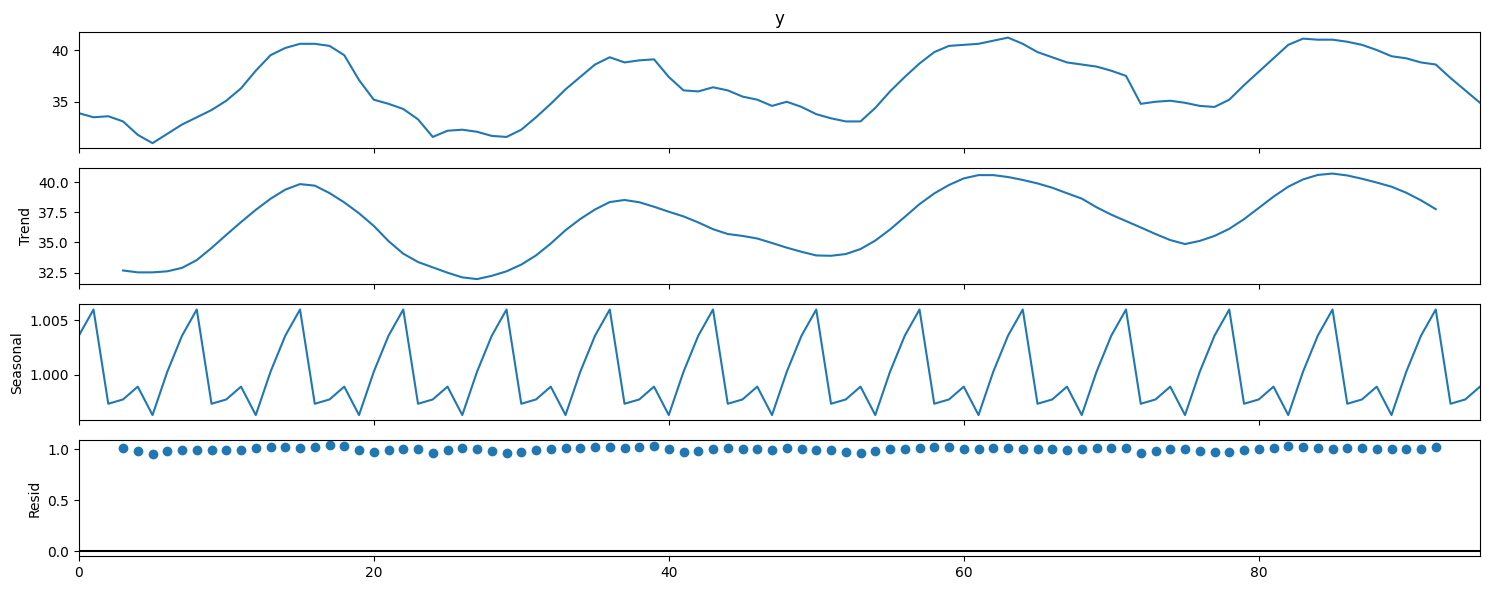

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
temperature = seasonal_decompose(weather01['y'] , model = 'multiplicative' , period = 7)
temperature.plot()



In [34]:
weather01.tail(50)

,ds,y,Humidity,Wind Speed (km/h),Precipitation (mm)
46,2024-06-22 22:00:00,35.2,50,18.7,0.00
47,2024-06-22 23:00:00,34.6,52,18.4,0.00
48,2024-06-23 00:00:00,35.0,45,14.4,0.00
49,2024-06-23 01:00:00,34.5,46,16.2,0.00
50,2024-06-23 02:00:00,33.8,49,14.4,0.00
51,2024-06-23 03:00:00,33.4,51,13.3,0.00
52,2024-06-23 04:00:00,33.1,53,11.9,0.00
53,2024-06-23 05:00:00,33.1,53,11.2,0.00
54,2024-06-23 06:00:00,34.4,48,12.2,0.00
55,2024-06-23 07:00:00,36.0,42,10.8,0.00


In [35]:
from prophet import  Prophet
m = Prophet()

In [36]:
m.fit(weather01)

13:54:04 - cmdstanpy - INFO - Chain [1] start processing
13:54:05 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
future = m.make_future_dataframe(periods=120, freq='H', include_history=True)
future.tail()

,ds
211,2024-06-29 19:00:00
212,2024-06-29 20:00:00
213,2024-06-29 21:00:00
214,2024-06-29 22:00:00
215,2024-06-29 23:00:00


In [38]:
forecast= m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
211,2024-06-29 19:00:00,35.747956,29.973501,40.929078
212,2024-06-29 20:00:00,35.106333,29.238386,40.393559
213,2024-06-29 21:00:00,34.332426,28.502345,39.705054
214,2024-06-29 22:00:00,33.485955,27.723508,38.766838
215,2024-06-29 23:00:00,32.760128,26.923327,38.422639


In [39]:
from prophet.plot import plot_plotly
plot_plotly(m,forecast)

c:\Users\shree\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [40]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
211,2024-06-29 19:00:00,35.747956,29.973501,40.929078
212,2024-06-29 20:00:00,35.106333,29.238386,40.393559
213,2024-06-29 21:00:00,34.332426,28.502345,39.705054
214,2024-06-29 22:00:00,33.485955,27.723508,38.766838
215,2024-06-29 23:00:00,32.760128,26.923327,38.422639


c:\Users\shree\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\shree\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\shree\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



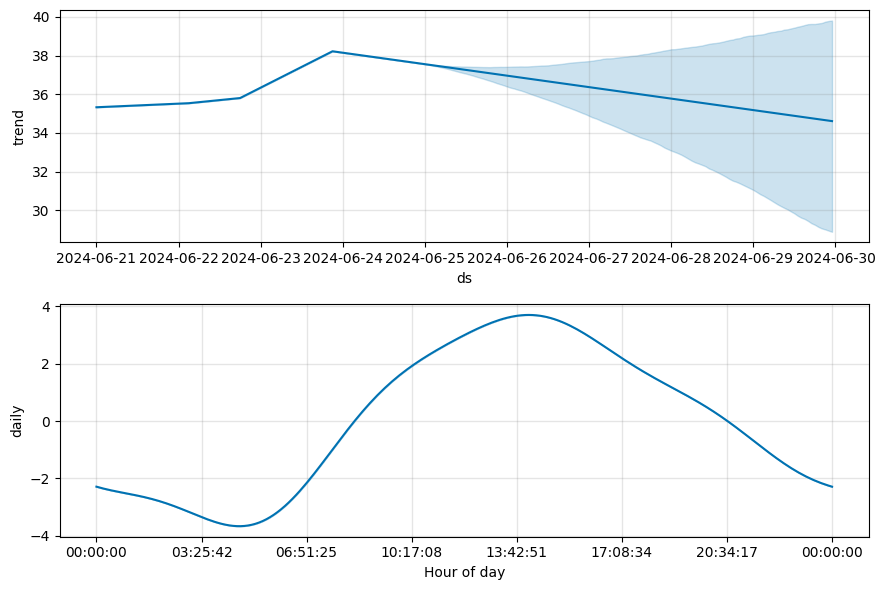

In [41]:
fig_2 = m.plot_components(forecast)

In [42]:
import pickle
with open('prophet.pkl','wb') as files:
    pickle.dump(m, files)


In [43]:
from prophet import Prophet
from datetime import datetime


user_date_str = input("Enter the date and time you want to predict in YYYY-MM-DD HH:MM format (e.g., 2025-12-31 15:00:00): ")

try:
  user_date_time = datetime.strptime(user_date_str, "%Y-%m-%d %H:%M")
except ValueError:
  print("Invalid date and time format. Please enter YYYY-MM-DD HH:MM.")
  exit()

user_date = user_date_time.date()

future_date = pd.DataFrame({'ds': [user_date]})


one_day_forecast = m.predict(future_date)
predicted_temp = one_day_forecast["yhat"].values[0]

print(f"Predicted temperature for {user_date_str} is: {predicted_temp:.2f}")


Predicted temperature for 2024-06-29 13:50 is: 32.89
